Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz

Training dataset size:  12049
Training starting ||W||: 0.0
	Epoch 0 Minibatch: 0 Accuracy: 0.52
	Epoch 0 Minibatch: 1 Accuracy: 0.745
	Epoch 0 Minibatch: 2 Accuracy: 0.8166666666666667
	Epoch 0 Minibatch: 3 Accuracy: 0.86
	Epoch 0 Minibatch: 4 Accuracy: 0.884
	Epoch 0 Minibatch: 5 Accuracy: 0.9016666666666666
	Epoch 0 Minibatch: 6 Accuracy: 0.9128571428571428
	Epoch 0 Minibatch: 7 Accuracy: 0.9225
	Epoch 0 Minibatch: 8 Accuracy: 0.9277777777777778
	Epoch 0 Minibatch: 9 Accuracy: 0.933
	Epoch 0 Minibatch: 20 Accuracy: 0.96
	Epoch 0 Minibatch: 40 Accuracy: 0.968780487804878
	Epoch 0 Minibatch: 60 Accuracy: 0.9747540983606557
	Epoch 0 Minibatch: 80 Accuracy: 0.9776543209876544
	Epoch 0 Minibatch: 100 Accuracy: 0.9795049504950495
	Epoch 0 Accuracy: 0.019000000000000017
	Epoch 10 Accuracy: 0

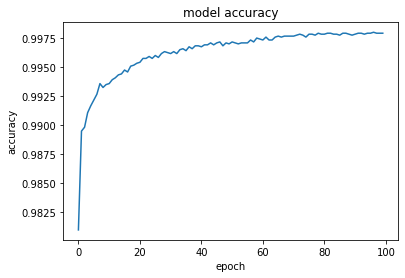


Testing model
Example # 986 Expected 3 Predicted 6


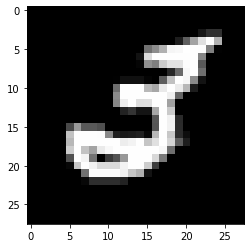

Example # 1903 Expected 6 Predicted 3


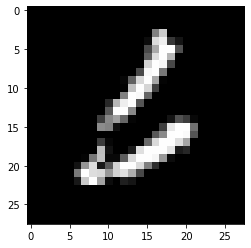


Test set error rate:  12 / 1968 Accuracy: 0.9939024390243902


In [3]:
'''
2020 清华大学 深度学习
Bobak 隋若礼 2019280018
binary logistic regression MNIST
'''

%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# dont forget to reupload mnist_data_loader.py on each new colab runtime
import mnist_data_loader

# prediction step
def sigmoid(X, W, b=0):
  z = np.dot(X, W) + b
  return 1 / (1 + np.exp(-z))

# count the errors
def classify(Z, Y):
  YHAT = np.round(Z)
  return np.count_nonzero(YHAT!=Y)

# 2class cross-entropy
def log_loss(Z, Y):
  return -(Y*np.log(Z) + (1 - Y)*np.log(1 - Z)).mean()

# gradient of loss wrt W
def gradient(X, Z, Y, batch_size):
  return np.dot((Z - Y), X) / batch_size

# update weights w regularization
def update(W, grad, alpha):
  return W - alpha * grad

# load data
mnist_dataset = mnist_data_loader.read_data_sets("./MNIST_data/", one_hot=False)
train_set = mnist_dataset.train
test_set = mnist_dataset.test
image = train_set.images[0]
print('\nTraining dataset size: ', train_set.num_examples)
# hyperparams
batch_size = 100
max_epoch = 100
learning_rate = 1e-1
# initialize W+b 
W = np.zeros(784)
b = 0
# training
print('Training starting ||W||:', np.linalg.norm(W))
accuracy = []
for epoch in range(0, max_epoch):
  iter_per_batch = train_set.num_examples // batch_size
  errors = 0
  for batch_id in range(0, iter_per_batch):
    batch = train_set.next_batch(batch_size)
    X, label = batch
    Y = label/3 - 1
    # prediction, accuracy, logloss, gradient, update
    Z = sigmoid(X, W, b)
    errors += classify(Z, Y)
    loss = log_loss(Z, Y)
    dedw = gradient(X, Z, Y, batch_size)
    W = update(W, dedw, learning_rate)
    if epoch == 0 and (batch_id < 10 or batch_id % 20 == 0):
      print('\tEpoch 0 Minibatch:', batch_id, 'Accuracy:', 1-(errors/(batch_size*(batch_id+1))))
  accuracy.append(1 - (errors / (iter_per_batch*batch_size)))
  if epoch % 10 == 0:
    print('\tEpoch', epoch, 'Accuracy:', 1-accuracy[-1])
print('Training ending ||W||:', np.linalg.norm(W))
plt.plot(accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
print('\nTesting model')
# test set
X,lbl = test_set.next_batch(test_set.num_examples)
Y = lbl/3-1
Z = sigmoid(X, W, b)
# count and show incorrect examples
err_idx = [i for (i,y) in enumerate(Y) if y!=np.round(Z)[i]]
for i in err_idx[-3:-1]:
  print('Example #', i, 'Expected', test_set.labels[i], 'Predicted', 3+3*int(np.round(Z)[i]))
  plt.imshow(np.reshape(test_set.images[i],[28,28]),cmap='gray')
  plt.show()
print('\nTest set error rate: ', len(err_idx), '/', test_set.num_examples, 'Accuracy:', 1-len(err_idx)/test_set.num_examples)